In [44]:
import os 
import cv2
from IPython.display import YouTubeVideo,display,HTML
from base64 import b64encode
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve
%matplotlib inline


In [45]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [46]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

In [47]:
#reading video 
source = 'race_car.mp4'  # source = 0 for webcam

cap=cv2.VideoCapture(source)


In [48]:
if not cap.isOpened():
    print("Error opening the video stream or file ")

In [49]:
# ret is a boolean expression 
ret, frame = cap.read()
ret

True

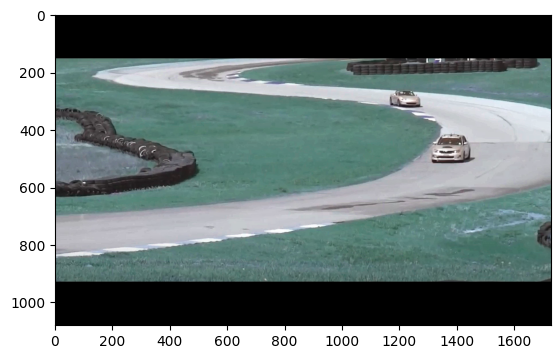

In [50]:
plt.imshow(frame)


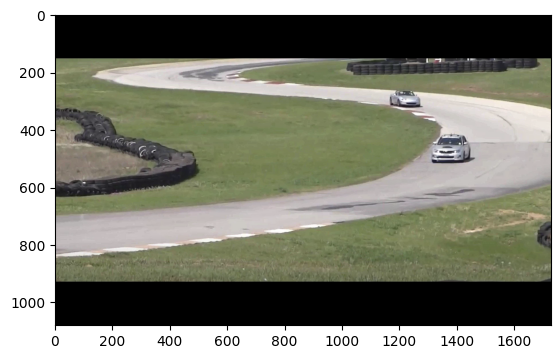

In [51]:
# the above frame was displayed in bgr format so cinvert into rgb using the belwoo code 
plt.imshow(frame[..., ::-1])

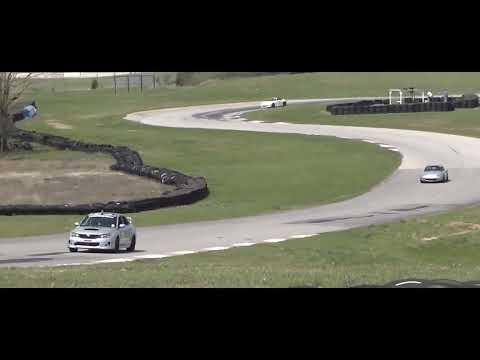

In [52]:
#we can even directly get the video from tthe youtube 
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

# video writing using open cv 
## Function Syntax
VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )


where, Parameters

1.filename: Name of the output video file.

2.fourcc: 4-character code of codec used to compress the frames. For example, 3.VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, 4.VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.

5.fps: Framerate of the created video stream.(ideally 30+ but depends on the probelm )

6.frameSize: Size of the video frames.

In [53]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 30, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))


In [54]:
#read until the video is completed 
while cap.isOpened():
    ret,frame=cap.read()

    if ret:
        out_avi.write(frame)
        out_mp4.write(frame)

    else :
        break

In [55]:
cap.release()
out_mp4.release()
out_avi.release()

## Note :
To display video we will install and use the ffmpeg package. Using ffmpeg we will change the encoding of the .mp4 file from XVID to H264

HTML 5 can properly render videos with H264 encoding and OpenCV doesn't have that encoding yet. That's why we need to change their encodings such that they can be rendered.

In [59]:
# Installing ffmpeg

!pip install ffmpeg-python


In [60]:
# Change video encoding of mp4 file from XVID to h264 
!ffmpeg -y -i race_car_out.mp4 -c:v libx264 race_car_converted.mp4


ffmpeg version 8.0 Copyright (c) 2000-2025 the FFmpeg developers
  built with clang version 21.1.2
  configuration: --prefix=/d/bld/ffmpeg_1758923949111/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --disable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libmp3lame --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libvorbis --enable-libopus --enable-librsvg --enable-ffplay --enable-vulkan --enable-libshaderc --pkg-config=/d/bld/ffmpeg_1758923949111/_

In [63]:
mp4 = open("race_car_converted.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")


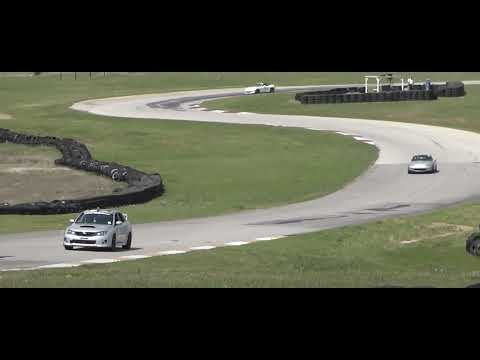

In [65]:
#the video rendered in the above cell should be the same as the following
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)